##  **This notebook is a Part III - Segmentation and Clustering of Neighbourhood Venues of Borough - Central ,East,West and downtownToronto**

### Here in this notebook there are three Parts namely Part I , Part II and Part III.
#### Part I -->  Data collection through Wikipidea usig BeautifulSoup python library.
#### Part II --> Get Latitude and Longitude for Segmentation and Clustering of Neighbourhood Venues.
#### Part III --> Segmentation and Clustering of Neighbourhood Venues of Borough - Central ,East,West and downtownToronto

## **Please note : Please goto/scroll to the section Part III for the purpose of this notebook**

 
### **[Click here for Part III Section](#cell2)**

## Part I -> Data Collection through wikipedia for Segmentation and clustering of Neighbourhood Venues in Toronto

>Data required for Segmentation and Clustering of Neighbourhoods for Toronto is available on wikipedia.To collect the data from wikipedia for toronto, 
Web Scraping on wikipedia is applied using BeautifulSoup python library.

In [1]:
# Import Libraries

import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd

# Install geocoder from conda
!conda install -c conda-forge geocoder --yes
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geocoder-1.38.1            |             py_0          52 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    ratelim-0.1.6              |           py35_0           5 KB  conda-forge
    orderedset-2.0             |           py35_0         685 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_0       conda-forge
    orderedset:

#### Create wikipedia url using requests get method by passing wikipdepia link and parser url using BeautifulSoup library to create soup object to html file  



In [2]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

website_url
soup = BeautifulSoup(website_url.text,'html.parser')

In [3]:
# Using soup object find the table with class wikitable sortable in html file 

table = soup.find('table',{'class':'wikitable sortable'})

#check table content
#table  -- comment due to output is very large
print("Done html Table retrieved")

Done html Table retrieved


In [4]:
#Create rows from table of  html file with tags that contain tr 

rows = table.find_all('tr')
#rows -- commented due to output is very large

print("Done Rows Retrived")

Done Rows Retrived


In [5]:
#Create a Dataframe to store Postcode,Borough  and Neighbourhood

columns = ['Postcode','Borough','Neighbourhood']
df_canada = pd.DataFrame(columns=columns)

#View the Dataframe
df_canada

,Postcode,Borough,Neighbourhood


### Walkthough each row and find the tage 'td' which is treated as cells in each 'tr' tag to retrieve postcode,borough and neighbourhood


In [6]:
postcode=[]
borough=[]
neighbourhood=[]

for row in rows:
    cells = row.find_all('td')
    if len(cells)>1:
        try:
            postcode.append(cells[0].get_text().strip('\n'))
            if cells[1].find('a') == True:
                
                borough.append(cells[1].find('a').get_text('title').strip('/n'))
                #borough.append(cells[1].get_text().strip('/n'))
            else:
                borough.append(cells[1].get_text().strip('/n'))
                #borough.append(cells[1].find('a').get_text('title').strip('/n'))
            
            if  cells[2].find('a') == True:
                neighbourhood.append(cells[2].find('a').get_text('title').strip('/n'))
            else:
                neighbourhood.append(cells[2].get_text().strip('/n'))                         
            
        except:
            None


In [7]:
# assign postcode,borough and neighbourhood from pevious step to df_canada Dataframe

df_canada['Postcode']=postcode
df_canada['Borough']=borough
df_canada['Neighbourhood']=neighbourhood

# Check 5 rows of dataframe
df_canada.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n


In [8]:
# Cehck how many of borough have "Not assigned" in order to eliminate from dataframe

df_canada.loc[(df_canada.Borough == 'Not assigned'),'Borough'].count()

77

In [9]:
# Filter dataframe for Borough with valid Borough's and reset the index

df_canada_filtered = df_canada.loc[~(df_canada.Borough == 'Not assigned')].reset_index()
df_canada_filtered.drop(columns='index',inplace=True)

# List 5 rows
df_canada_filtered.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods\n
1,M4A,North York,Victoria Village\n
2,M5A,Downtown Toronto,Harbourfront\n
3,M5A,Downtown Toronto,Regent Park\n
4,M6A,North York,Lawrence Heights\n


In [10]:
# Verify df_canada_filtered for any borough have 'Not assigned' after filtering

df_canada_filtered.loc[(df_canada_filtered.Borough == 'Not assigned'),'Borough'].count()

0

In [11]:
# Check for newline characters ,since tags in html sometime contains values with newline

print("Newline characters in Postcode :",df_canada_filtered.loc[df_canada_filtered.Postcode.str.contains('\n'),'Postcode'].count())

print("Newline characters in Borough :",df_canada_filtered.loc[df_canada_filtered.Borough.str.contains('\n'),'Borough'].count())

print("Newline characters in Neighbourhood :",df_canada_filtered.loc[df_canada_filtered.Neighbourhood.str.contains('\n'),'Neighbourhood'].count())

Newline characters in Postcode : 0
Newline characters in Borough : 0
Newline characters in Neighbourhood : 211


In [12]:
# Remove newline characters for Neighbourhood

df_canada_filtered.Neighbourhood.replace('\n','',regex=True,inplace=True)

# Verify after replacing '\n'
print("Newline characters after replacement in Neighbourhood :",df_canada_filtered.loc[df_canada_filtered.Neighbourhood.str.contains('\n'),'Neighbourhood'].count())

Newline characters after replacement in Neighbourhood : 0


In [13]:
# As per the assignment if any Neighbourhood is "Not assigned" then borough is assigned to Neighbourhood.
# Verify

df_canada_filtered[df_canada_filtered.Neighbourhood == 'Not assigned']

,Postcode,Borough,Neighbourhood
6,M7A,Queen's Park,Not assigned


In [14]:
# Assign Bourgh value to Neighbourhood at the index ind

ind= df_canada_filtered[(df_canada_filtered.Neighbourhood  == 'Not assigned')].index.values[0]
df_canada_filtered.loc[ind,'Neighbourhood'] = df_canada_filtered.loc[ind,'Borough']    

# Verify the Neighbourhood at index 'ind'
df_canada_filtered.loc[ind,['Borough','Neighbourhood']]

Borough          Queen's Park
Neighbourhood    Queen's Park
Name: 6, dtype: object

In [15]:
# As per assignment ,when there are more than one neighbourhood for same Postcode and Borough ,in such cases Neighbourhood have to be clubbed with comma separated

# This can be achived by performing groupby on (['Postcode','Borough']) and join Neighbourhood with comma separated

# For example postcode M5A
df_canada_filtered[df_canada_filtered.Postcode == 'M5A']

# Groupby (['Postcode','Borough']) and join on neighbourhood with comma separated

df_final = df_canada_filtered[['Postcode','Borough','Neighbourhood']].\
groupby(['Postcode','Borough'])['Neighbourhood'].\
apply(lambda x: ','.join(x)).reset_index()

In [16]:
# Verify above scenario for Postcode = 'M5A'

df_final[df_final.Postcode == 'M5A']

,Postcode,Borough,Neighbourhood
53,M5A,Downtown Toronto,"Harbourfront,Regent Park"


In [17]:
# Now check rows of df_final to verify 

df_final.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


###  Here is the final shape of dataframe df_final after applying all scenarios

In [18]:
print("Shape of Dataframe :",df_final.shape)

print("\nThere are {} rows and {} columns in df_final Dataframe".format(df_final.shape[0],df_final.shape[1]))

Shape of Dataframe : (103, 3)

There are 103 rows and 3 columns in df_final Dataframe


## Part II -> Create a Dataframe for Neighbourhood Latitude and Longitude and merge with df_final for Segmentation and clustering in Toronto

In [19]:
#Using geocoder obtain coordinates

lat_lng_coords = None
g =  geocoder.google('{},Toronto,Ontario'.format('M6G'))
g.status

'REQUEST_DENIED'

**Note : geocoder is not responding to the requests and status is request denied hence utilizing the CSV file to obtain Longitude and Latitude**

In [20]:
# The code was removed by Watson Studio for sharing.

In [21]:
geo_data = pd.read_csv(body)
geo_data.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [22]:
# Geo_data is based on Postal Code so Now match the column name "Postal Code" of geo_data with "Postcode" of df_final which is used as key to merge two dataframe in net steps

# Rename the geo_data Postal Code to Postcode as per df_final dataframe
geo_data.rename(columns={'Postal Code':'Postcode'},inplace=True)

print("geo_data columns after renaming :",geo_data.columns)

geo_data columns after renaming : Index(['Postcode', 'Latitude', 'Longitude'], dtype='object')


### Merge/join geo_data with df_final

In [23]:
df_merged = pd.merge(df_final,geo_data,on='Postcode')



### Merged Dataframe with Latitude and Longitude for each Postal code

 **This dataframe is the result of Part-II**

In [24]:
df_merged

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


<a id="cell2"></a>

## Part III ---> Segmentation and Clustering of Neighbourhood Venues of Borough - Central ,East,West and downtownToronto

### Use foursqaure API to explore neighbourhoods for segmentation and clustering

#### Use geopy library to get the latitude and longitude values of Toronto

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>toronto_explorer</em>, as shown below.  



In [25]:
# Import Libraries

from geopy import Nominatim # Geo locator for address

!conda install -c conda-forge folium=0.5.0 --yes
import folium # to create Map

import json # html to Json
import requests # For GET requests


from pandas.io.json import json_normalize # Flatten Json

import numpy as np


from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         560 KB

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


altair-2.2.2         | 462 KB    | #############################

In [26]:
address = "Toronto,ON"
geolocator = Nominatim(user_agent='toronto_explorer')
location = geolocator.geocode(address)
longitude = location.longitude
latitude = location.latitude
print("the geograpical coordinates of Toronto city are {},{}".format(latitude,longitude))

the geograpical coordinates of Toronto city are 43.653963,-79.387207


#### Create a map of Toronto with neighborhoods superimposed on top.

In [27]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Borough'], df_merged['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

    
map_toronto

In [28]:
# Find unique Borough's

df_merged.Borough.unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

#### Analysis  for Borough's that contain Toronto  such as Central,East,West and Downtown Toronto

In [29]:
# List all Borough's that contain Toronto
df_merged[df_merged.Borough.str.contains('Toronto')]

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


So let me slice the original dataframe df_merged and create a new dataframe of the Toronto data df_Toronto.

In [30]:
#  Create df_Toronto for Borough '*Toronto'
df_Toronto = df_merged[df_merged.Borough.str.contains('Toronto')].reset_index(drop=True)

#List 5 rows of df_Toronto
df_Toronto.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [31]:
# Find the shape

df_Toronto.shape

(38, 5)

In [32]:
### Get Geographical coordinates of Toronto

address = "Toronto,ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude=location.longitude

print("The Geographical coordinates of North York are {},{}".format(latitude,longitude))

The Geographical coordinates of North York are 43.653963,-79.387207


#### Visualize Central Toronto and the neighborhoods in it.

In [33]:
#create CentralToronto map
map_CentralToronto = folium.Map(location=[latitude,longitude],zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Neighbourhood']):
    label = folium.Popup(neighbourhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CentralToronto)  
    
map_CentralToronto


 ## **Now by Utilizing Foursquare API , explore neighbourhoods to segment them.**



#### **Define Foursquare Credentials and Version**

In [34]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 52CQMN4LRJXODH5CM2SIP2GE15EJAXFDFKWE5BW4OKLIPRBQ
CLIENT_SECRET:QDKHVDQEVP4UPV0F14VK4ROVQMSXIN4TS1YFR14ZOHMK1ZFW


**Explore the first Neighbourhood of East Toront**

Get the first Neighbourhood name and coordinates

In [35]:
neighbourhood_name = df_Toronto.loc[0,'Neighbourhood']
neighbourhood_latitude = df_Toronto.loc[0,'Latitude']
neighbourhood_longitude = df_Toronto.loc[0,'Longitude']

print("The Geogaphical coordinates for \"{}\" are {},{}".format(neighbourhood_name,neighbourhood_latitude,neighbourhood_longitude))

The Geogaphical coordinates for "The Beaches" are 43.67635739999999,-79.2930312


#### Now, get the top 100 venues that are in "The Beaches" within a radius of 500 meters.  
First create the GET request URL. Name URL as **url**.

In [36]:
LIMIT=100
RADIUS=500
url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.\
format(CLIENT_ID,CLIENT_SECRET,VERSION,neighbourhood_latitude,neighbourhood_longitude,RADIUS,LIMIT)

# Print url
url

'https://api.foursquare.com/v2/venues/explore?&client_id=52CQMN4LRJXODH5CM2SIP2GE15EJAXFDFKWE5BW4OKLIPRBQ&client_secret=QDKHVDQEVP4UPV0F14VK4ROVQMSXIN4TS1YFR14ZOHMK1ZFW&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

Send the GET request and examine results

In [37]:
# GET request

results = requests.get(url).json()
#results

In [38]:
# Let me verify items in group at 0
results['response']['groups'][0]['items'][0]

{'reasons': {'count': 0,
  'items': [{'reasonName': 'globalInteractionReason',
    'summary': 'This spot is popular',
    'type': 'general'}]},
 'referralId': 'e-0-4ad4c062f964a52011f820e3-0',
 'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
     'suffix': '.png'},
    'id': '50aa9e744b90af0d42d5de0e',
    'name': 'Health Food Store',
    'pluralName': 'Health Food Stores',
    'primary': True,
    'shortName': 'Health Food Store'}],
  'id': '4ad4c062f964a52011f820e3',
  'location': {'address': '125 Southwood Dr',
   'cc': 'CA',
   'city': 'Toronto',
   'country': 'Canada',
   'distance': 471,
   'formattedAddress': ['125 Southwood Dr', 'Toronto ON M4E 0B8', 'Canada'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.678879,
     'lng': -79.297734}],
   'lat': 43.678879,
   'lng': -79.297734,
   'postalCode': 'M4E 0B8',
   'state': 'ON'},
  'name': 'The Big Carrot Natural Food Market',
  'photos': {'count': 0, 'groups'

#### From above output results, all the information is in 'items' key .let me process those items as below.

In [39]:
# function that extracts the category of the venue,this function is called in next step
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Now to clean json file and transform it into Dataframe**

In [40]:
# Invoke get_category_type for each near by venues

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
1,Grover Pub and Grub,Pub,43.679181,-79.297215
2,St-Denis Studios Inc.,Music Venue,43.675031,-79.288022
3,Upper Beaches,Neighborhood,43.680563,-79.292869


Find number of Venues returend by foursquare

In [41]:
print('{} Venues are returned by Foursquare'.format(nearby_venues.shape[0]))

4 Venues are returned by Foursquare


# Now Will explore all Neighbours of Borough with East,West,Central and Downtown Toronto  

#### Below function is to repeate the process for all the neighbourhoods of Toronto

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Below code will invoke the getNearbyVenues function for all the neighbourhoods of North York and creates Dataframe of North York Venues

In [43]:
Toronto_venues = getNearbyVenues(names=df_Toronto['Neighbourhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )


The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvall

#### find the length/shape and first few rows of Dataframe

In [44]:
print("Length of the DataFrame:",Toronto_venues.shape)
print("\n\nList of 5 rows of DataFrame :")
Toronto_venues.head()

Length of the DataFrame: (1701, 7)


List of 5 rows of DataFrame :


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,St-Denis Studios Inc.,43.675031,-79.288022,Music Venue
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


Find Number of Venues for each Neighbourhood of Toronto

In [45]:
Toronto_venues.groupby(['Neighbourhood']).agg('count')

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"Brockton,Exhibition Place,Parkdale Village",19,19,19,19,19,19
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",15,15,15,15,15,15
"Cabbagetown,St. James Town",44,44,44,44,44,44
Central Bay Street,88,88,88,88,88,88
"Chinatown,Grange Park,Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


#### List of unique Categories 

In [46]:
print(" There are {} unique Venue Categories for North York".format(len(Toronto_venues['Venue Category'].unique())))

 There are 237 unique Venue Categories for North York


# Analyzing each Neighbourhood

Onehot code Venue Categories

In [47]:
# one hot encoding,each "Venue Category" is listed as column
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head(6)

,Neighbourhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West,Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"The Danforth West,Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the toronto DataFrame size

#### Next, let me group rows by neighbourhood and by taking the mean get the frequency of each category

In [48]:
Toronto_grouped = Toronto_onehot.groupby(['Neighbourhood']).mean().reset_index()

# List 5 rows
Toronto_grouped.head()

,Neighbourhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.04,...,0.0,0.0,0.0,0.010000,0.0,0.0,0.01,0.0,0.01,0.000000
1,Berczy Park,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.017544,0.0,0.0,0.00,0.0,0.00,0.000000
2,"Brockton,Exhibition Place,Parkdale Village",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.058824
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0,0.0,0.066667,0.066667,0.066667,0.133333,0.2,0.133333,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000


Check the size of the Toronto_grouped dataframe

In [49]:
Toronto_grouped.shape

(38, 238)

#### Print top 5 most common venues for each Neighbourhood

In [50]:
num_top_venues = 5

for hood in Toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2           Steakhouse  0.04
3  American Restaurant  0.04
4      Thai Restaurant  0.04


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2    Restaurant  0.04
3          Café  0.04
4      Beer Bar  0.04


----Brockton,Exhibition Place,Parkdale Village----
                    venue  freq
0          Breakfast Spot  0.11
1             Coffee Shop  0.11
2                    Café  0.11
3                     Gym  0.05
4  Furniture / Home Store  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.12
1         Yoga Studio  0.06
2       Auto Workshop  0.06
3          Comic Shop  0.06
4                Park  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.20
1    

### Create a DataFrame that have top most venues based on the frequency  
First  define a function that will order the venues in descending order

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Next create a Dataframe that consists of top 10 venues for each Neighbourhood

In [52]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,Thai Restaurant,American Restaurant,Hotel,Bakery,Bar,Burger Joint,Asian Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Beer Bar,Seafood Restaurant,Farmers Market,Restaurant,Café
2,"Brockton,Exhibition Place,Parkdale Village",Breakfast Spot,Café,Coffee Shop,Gym,Climbing Gym,Burrito Place,Stadium,Bar,Restaurant,Caribbean Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Park,Recording Studio
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Terminal,Airport Lounge,Boutique,Sculpture Garden,Harbor / Marina,Boat or Ferry,Plane,Airport Gate,Airport Food Court


###  **Cluster Neighbourhoods**  
Run k-Means to cluster neighbourhood venues by using best K method

wcss is Within cluster sum of squared errors also know as Elbow method is used to determine the best K bsaed on the curve shape

In [53]:
wcss =[]
Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)
for k in np.arange(2,11):
    kmeans = KMeans(n_clusters=k,random_state=0).fit(Toronto_grouped_clustering)
    wcss.append(kmeans.inertia_)

print("wcss",wcss)


wcss [2.6168059625417621, 2.1331931109335449, 1.8577456277253794, 1.6290104111789052, 1.3889956277253794, 1.2730891126046955, 1.0717096042075147, 0.94593218935907242, 0.87695471084551546]


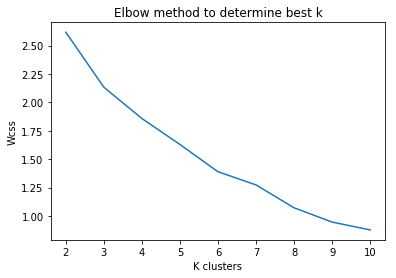

In [54]:
plt.plot(np.arange(2,11),wcss)
plt.title("Elbow method to determine best k")
plt.xlabel("K clusters")
plt.ylabel("Wcss")
plt.show()

In [55]:
# From above WCSS  plot at clusters k=3 or 6
# considering k=3 

kmeans_clusters = KMeans(n_clusters=3,random_state=0).fit(Toronto_grouped_clustering)
kmeans_clusters.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

__Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.__

In [56]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_clusters.labels_ + 1) # adding 1 to labels_1 to display clusters as 1,2,3 instead of 0,1,2

Toronto_cluster = df_Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_cluster = Toronto_cluster.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood',how='inner')

Toronto_cluster.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Health Food Store,Pub,Neighborhood,Music Venue,Convenience Store,Cosmetics Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,2,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Brewery,Japanese Restaurant,Sports Bar,Spa
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,2,Park,Sandwich Place,Liquor Store,Movie Theater,Burger Joint,Burrito Place,Light Rail Station,Fast Food Restaurant,Fish & Chips Shop,Steakhouse
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Cheese Shop,Fish Market,Latin American Restaurant,Coworking Space
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,2,Construction & Landscaping,Park,Swim School,Bus Line,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


#### Next Visualize the resulting clusters

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters=3
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
#markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_cluster['Latitude'], Toronto_cluster['Longitude'], Toronto_cluster['Neighbourhood'], Toronto_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters  
Now,examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

## Cluster 1

In [58]:
Cluster1 = Toronto_cluster.loc[Toronto_cluster['Cluster Labels'] == 1, 
                     Toronto_cluster.columns[[2] + list(range(5, Toronto_cluster.shape[1]))]]

Cluster1

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Moore Park,Summerhill East",1,Trail,Playground,Tennis Court,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Yoga Studio
10,Rosedale,1,Park,Trail,Playground,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Yoga Studio


Cluster 1 understanding:

From Cluster 1 ,two rows with 3 neighbourhoods frist 3 most common venues are

1. More distinct between neighbours higher the percentage of frequency such as PARK is distinct in first 3 common Venues.so it is 50% from below code execution.
2. From 4th to 10 Most common venues but not in the neighbourhood as per below code result their percentaage is 0 for example "discount Store".

Therefore cluster Profile is PARK,TRAIL,PLAYGROUND,TENNIS COURT

Similary we can profile for other clusters.

In [59]:
# Let me reuse below code to check the percentage of frequency
num_top_venues = 10

hood = ['Moore Park,Summerhill East','Rosedale']

for hood in hood:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    #temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Moore Park,Summerhill East----
                       venue      freq
0               Tennis Court  0.333333
1                      Trail  0.333333
2                 Playground  0.333333
3                   Pharmacy  0.000000
4                  Pet Store  0.000000
5                Men's Store  0.000000
6              Metro Station  0.000000
7         Mexican Restaurant  0.000000
8  Middle Eastern Restaurant  0.000000
9         Miscellaneous Shop  0.000000


----Rosedale----
                        venue  freq
0                        Park  0.50
1                  Playground  0.25
2                       Trail  0.25
3                Neighborhood  0.00
4                 Men's Store  0.00
5               Metro Station  0.00
6          Mexican Restaurant  0.00
7   Middle Eastern Restaurant  0.00
8          Miscellaneous Shop  0.00
9  Modern European Restaurant  0.00




In [60]:
# check percentage of frequency for Discoung Store
temp[temp.venue == 'Discount Store']

,venue,freq
76,Discount Store,0.0


## Cluster 2

In [61]:
Toronto_cluster.loc[Toronto_cluster['Cluster Labels'] == 2, 
                     Toronto_cluster.columns[[2] + list(range(5, Toronto_cluster.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,2,Health Food Store,Pub,Neighborhood,Music Venue,Convenience Store,Cosmetics Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
1,"The Danforth West,Riverdale",2,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Brewery,Japanese Restaurant,Sports Bar,Spa
2,"The Beaches West,India Bazaar",2,Park,Sandwich Place,Liquor Store,Movie Theater,Burger Joint,Burrito Place,Light Rail Station,Fast Food Restaurant,Fish & Chips Shop,Steakhouse
3,Studio District,2,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Cheese Shop,Fish Market,Latin American Restaurant,Coworking Space
4,Lawrence Park,2,Construction & Landscaping,Park,Swim School,Bus Line,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
5,Davisville North,2,Hotel,Breakfast Spot,Food & Drink Shop,Clothing Store,Sandwich Place,Park,Gym,Ethiopian Restaurant,Electronics Store,Event Space
6,North Toronto West,2,Clothing Store,Coffee Shop,Sporting Goods Shop,Yoga Studio,Fast Food Restaurant,Pet Store,Chinese Restaurant,Rental Car Location,Dessert Shop,Salon / Barbershop
7,Davisville,2,Sandwich Place,Dessert Shop,Pizza Place,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Pharmacy,Brewery,Restaurant
9,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",2,Coffee Shop,Pub,Pizza Place,American Restaurant,Light Rail Station,Sports Bar,Bagel Shop,Supermarket,Sushi Restaurant,Fried Chicken Joint
11,"Cabbagetown,St. James Town",2,Coffee Shop,Bakery,Pizza Place,Pub,Italian Restaurant,Market,Café,Restaurant,Butcher,Japanese Restaurant


## Cluster 3

In [62]:
Toronto_cluster.loc[Toronto_cluster['Cluster Labels'] == 3, 
                     Toronto_cluster.columns[[2] + list(range(5, Toronto_cluster.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,3,Garden,Filipino Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [63]:
num_top_venues = 10

hood = ['Roselawn']

for hood in hood:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    #temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Roselawn----
                             venue  freq
0                           Garden   1.0
1                   Adult Boutique   0.0
2                Martial Arts Dojo   0.0
3                      Men's Store   0.0
4                    Metro Station   0.0
5               Mexican Restaurant   0.0
6        Middle Eastern Restaurant   0.0
7               Miscellaneous Shop   0.0
8       Modern European Restaurant   0.0
9  Molecular Gastronomy Restaurant   0.0


